In [1]:
import os
os.chdir('/home/gsalinas/GitHub/nbaaxionns/')

import numpy as np
import multiprocessing as mp
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['figure.dpi']= 128

from classes import AxionMiniclusterNFW, NeutronStar, Particles, AxionStar
from typing import Callable

from scripts import (repeat, selectrvs, metropolis, rdistr, rm_far,
                    min_approach, energy, grav_en, add_ps, nums_vs, mag, roche, G,
                    trajAC, cylmax, trajs, trajAC, drawrvs, outdir, joinnpys, singletrajs,
                    hits, allhits, plot_traj, plot_trajs, zeroat, smoothtraj)

In [19]:
eventnames = ['MCGKNFIM', 'MCORMXPG', 'ASBFNUDC', 'ASXVCBIZ', 'ASBAALCG', 'ASDOQXGX']
eventname = eventnames[2]
eventname = 'ASEJXFHX'

In [20]:
with open(outdir + eventname + '/README.txt', 'r') as readme:
    print(readme.read())

Event name:                 ASEJXFHX
Axion mass:                 1 x 10^-5 eV

---------- Neutron Star properties ----------
Mass:                       1.0 M_Sun
Radius:                     10.0 km
Period:                     1.0 s
Rotation axis:              [0. 0. 1.]
B0:                         1.0 x 10^14 G
Misalignement:              0.0 rad
Psi0:                       0.0 rad
Max conversion radius:      46.06 km

---------- Axion Clump properties ----------
Clump type:                 Dilute Axion Star
Mass:                       1.0 x 10^-12 M_Sun
Radius 99%:                 2.64e+03 km
Truncation Radius:          5.28e+03 km
Velocity dispersion:        Flat

---------- Encounter data ----------
Initial clump position:     [0.00e+00, 0.00e+00, 1.00e+16] km
Initial clump velocity:     [0.00e+00, 0.00e+00, -2.00e+02] km/s
Impact parameter:           0.00e+00 km
Roche radius:               6.65e+07 km
Position at Roche radius:   [0.00e+00, 0.00e+00, 6.02e+07] km
Velocity at Roche 

In [13]:
# trjs = np.load(outdir + eventname + '/' + eventname + '_0trajs.npy')
# simtrajs = [np.array(simtraj) for simtraj in list(singletrajs(trjs))]
# plot_trajs(simtrajs, NeutronStar(), show=True)

In [14]:
ahits = np.load(outdir + eventname + '/' + eventname + 'conversion.npy')

In [15]:
len(ahits)

3277316

In [16]:
ts = ahits.T[1] + ahits.T[-1]
ts -= min(ts)
ts /= 3600

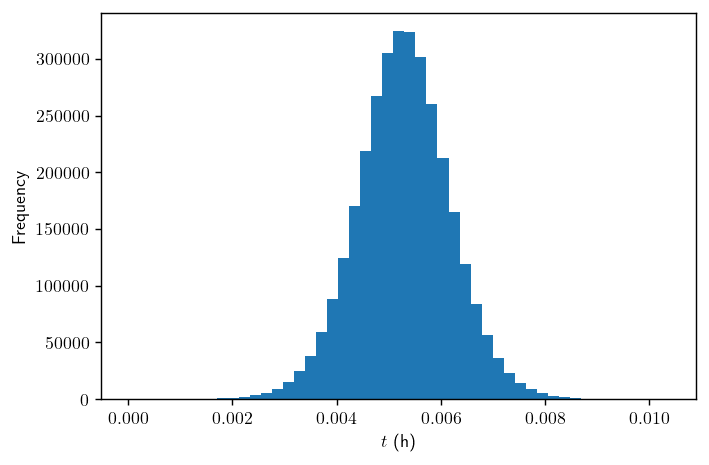

In [17]:
plt.hist(ts, bins=np.linspace(0, max(ts), 50))
plt.xlabel("$t$ (h)")
plt.ylabel("Frequency");

In [18]:
XX, YY, ZZ = ahits.T[2:5]

npoints = 100_000
marker_data = go.Scatter3d(
    x=XX[:npoints], 
    y=YY[:npoints], 
    z=ZZ[:npoints], 
    marker=go.scatter3d.Marker(size=0.5), 
    opacity=0.8, 
    mode='markers'
)
fig=go.Figure(data=marker_data)
fig.update_layout(
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False),
    )
)
fig.show()